# PROJECT : HANDWRITTEN DIGIT RECOGNITION SYSTEM

## PART 1 : DATA PREPROCESSING

### STEP 1: Import the Libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,r2_score,mean_squared_error,mean_absolute_error

### STEP 2 : IMPORT THE DATA

In [98]:
# We are provided with two datasets named train and test.
# Train and Test are two subsets of the dataset.
# Training data is typically larger than testing data.
# Training dataset is fed into the machine learning model to discover and learn patterns. In this way, it trains our model. 

In [99]:
df=pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### STEP 3 : Divide the dataset into input and output. i.e Feature Matrix 'X' and Column Vector 'Y'

In [100]:
X= df.iloc[:,1:] #from pixel 0 to pixel 783
Y=df.iloc[:,0] #column named label

In [101]:
print(X)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [102]:
print(Y)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


## INSIGHTS ON MNSIT HANDWRITTEN DIGIT DATASET

#### It is a set of 70,000 small images of digits handwritten by high school students and employees of the US causes Bureau.
#### Each image has 28*28 = 784 features.
#### Also Each image has 28*28 pixels.
#### Following is the Sample images from MNIST test dataset taken from Wikipedia.

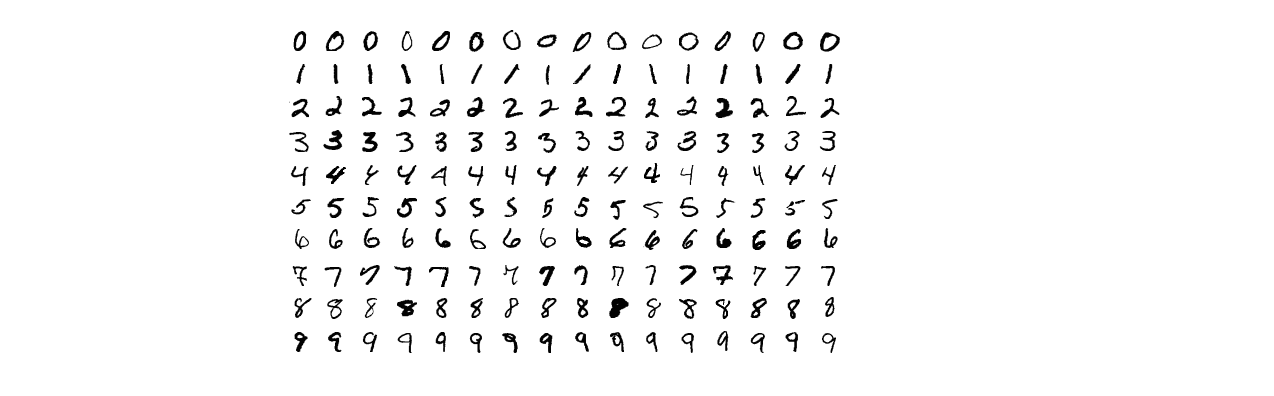

#### Plotiing the dataset for proper visualisation using matplotlib.

In [103]:
label=df.iloc[0,1:].values
label=label.reshape(28,28)
print("REPRESENTATION IN A FORM OF ARRAY")
print(label) 

REPRESENTATION IN A FORM OF ARRAY
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 188 255  94   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 191 250 253  93   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  123 248 253 167  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80
  247 253 208  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 

GRAPHICAL REPRESENTATION


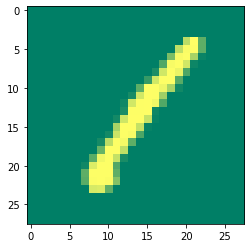

In [104]:
print('GRAPHICAL REPRESENTATION')
plt.imshow(label,cmap='summer')

### STEP 4 : No Simple Imputer required as there is no missing data.

In [105]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

### STEP 5: Encoding is not required here because of absence of categorical data.

### STEP 6 : Splitting dataset into train and test

In [106]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.4,random_state=1)

In [107]:
len(Xtrain)

25200

In [108]:
len(Xtest)

16800

### STEP 7: Feature Scaling

In [109]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrain[::]=sc.fit_transform(Xtrain[::])
Xtest[::]=sc.fit_transform(Xtest[::])
Xtest
Xtrain

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
25153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035443,-0.023117,-0.01385,-0.009396,-0.009579,-0.0063,0.0,0.0,0.0,0.0
14350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035443,-0.023117,-0.01385,-0.009396,-0.009579,-0.0063,0.0,0.0,0.0,0.0
24843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035443,-0.023117,-0.01385,-0.009396,-0.009579,-0.0063,0.0,0.0,0.0,0.0
6282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035443,-0.023117,-0.01385,-0.009396,-0.009579,-0.0063,0.0,0.0,0.0,0.0
41796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035443,-0.023117,-0.01385,-0.009396,-0.009579,-0.0063,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035443,-0.023117,-0.01385,-0.009396,-0.009579,-0.0063,0.0,0.0,0.0,0.0
32511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035443,-0.023117,-0.01385,-0.009396,-0.009579,-0.0063,0.0,0.0,0.0,0.0
5192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035443,-0.023117,-0.01385,-0.009396,-0.009579,-0.0063,0.0,0.0,0.0,0.0
12172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035443,-0.023117,-0.01385,-0.009396,-0.009579,-0.0063,0.0,0.0,0.0,0.0


## PART 2 : BUILDING A CLASSIFICATION MODEL

### LOGISTIC REGRESSION

In [110]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [111]:
LR.fit(Xtrain,Ytrain)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
Yest_lr=LR.predict(Xtest) #Estimated or predicted value

In [113]:
print(f'Confusion Matrix for Logistic Regression Model is : \n{confusion_matrix(Ytest,Yest_lr)}.')

Confusion Matrix for Logistic Regression Model is : 
[[1579    0   10    3    6   18   31    5   12    3]
 [   0 1787    9    8    2    6    5    2   23    5]
 [  11   30 1483   35   18   13   28   23   32    9]
 [   4    7   46 1538    4   78    6   21   48   23]
 [   6   13   21    1 1480    4   28   15   12   56]
 [  20   14   23   62   17 1275   23   10   35   18]
 [  10    5   13    3   17   26 1578    3    8    1]
 [   1    6   16   15   21    2    2 1590    6   80]
 [  13   37   31   49   10   66   13    3 1360   35]
 [   6    7   14   22   77   20    2   69   12 1447]].


In [114]:
print(f'Accuracy Score is {accuracy_score(Ytest,Yest_lr)}.')
print(f"Recall Score is {recall_score(Ytest,Yest_lr,average='micro')}.")
print(f"Precison Score is {precision_score(Ytest,Yest_lr,average='micro')}.")
print(f"F1 Score is {f1_score(Ytest,Yest_lr,average='micro')}.")
print(f'Mean Absolute Error of the Model is given as {mean_absolute_error(Ytest,Yest_lr)}.')
print(f'Mean Squared Error of the Model is given as {mean_squared_error(Ytest,Yest_lr)}.')
print(f'R2 score of the Model is {r2_score(Ytest,Yest_lr)}.')
print(f'Root mean squared error is {np.sqrt(mean_squared_error(Ytest,Yest_lr))}.')

Accuracy Score is 0.8998214285714285.
Recall Score is 0.8998214285714285.
Precison Score is 0.8998214285714285.
F1 Score is 0.8998214285714285.
Mean Absolute Error of the Model is given as 0.355.
Mean Squared Error of the Model is given as 1.644404761904762.
R2 score of the Model is 0.8026547680022762.
Root mean squared error is 1.2823434648738854.


## NAIVE BAYE'S CLASSIFICATION

In [115]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [116]:
gnb.fit(Xtrain,Ytrain)

GaussianNB()

In [117]:
Yest_gnb=gnb.predict(Xtest)

In [118]:
print(f'Confusion Matrix of Naive Bayes Classification is:\n {confusion_matrix(Ytest,Yest_gnb)}.')

Confusion Matrix of Naive Bayes Classification is:
 [[   0    0   56 1480    3    0    0  128    0    0]
 [   0    0   16 1828    1    0    0    2    0    0]
 [   0    1  322 1244    0    1    6  105    2    1]
 [   0    0    7 1763    0    0    0    4    0    1]
 [   0    0   33 1530   39    3    0   31    0    0]
 [   0    0   60 1068  214   17    0  137    1    0]
 [   0    0  777  754   11   67   47    8    0    0]
 [   0    0    2 1242    0    0    0  494    0    1]
 [   0    0   19 1462   62    7    0   65    2    0]
 [   0    0    6 1549    1    0    0  119    0    1]].


In [119]:
print(f'Accuracy Score is {accuracy_score(Ytest,Yest_gnb)}.')
print(f"Recall Score is {recall_score(Ytest,Yest_gnb,average='micro')}.")
print(f"Precison Score is {precision_score(Ytest,Yest_gnb,average='micro')}.")
print(f"F1 Score is {f1_score(Ytest,Yest_gnb,average='micro')}.")
print(f'Mean Absolute Error of the Model is given as {mean_absolute_error(Ytest,Yest_gnb)}.')
print(f'Mean Squared Error of the Model is given as {mean_squared_error(Ytest,Yest_gnb)}.')
print(f'R2 score of the Model is {r2_score(Ytest,Yest_gnb)}.')
print(f'Root mean squared error is {np.sqrt(mean_squared_error(Ytest,Yest_gnb))}.')

Accuracy Score is 0.15982142857142856.
Recall Score is 0.15982142857142856.
Precison Score is 0.15982142857142856.
F1 Score is 0.15982142857142856.
Mean Absolute Error of the Model is given as 2.575892857142857.
Mean Squared Error of the Model is given as 10.30827380952381.
R2 score of the Model is -0.2370972971886558.
Root mean squared error is 3.2106500602718775.


## RANDOM FOREST TREE MODEL

In [120]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=700,criterion='entropy')

In [121]:
rf.fit(Xtrain,Ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=700)

In [122]:
Yest_rf=rf.predict(Xtest)

In [123]:
print(f'Confusion Matrix of Random Forest is:\n {confusion_matrix(Ytest,Yest_rf)}.')

Confusion Matrix of Random Forest is:
 [[1635    0    3    0    2    3    9    1   13    1]
 [   0 1817    5   13    3    2    2    1    4    0]
 [   3    1 1618   10   10    1   13   12   11    3]
 [   2    1   27 1670    1   28    0   11   25   10]
 [   3    2    7    0 1579    1    7    4    2   31]
 [   8    2    3   20    1 1427   12    4   10   10]
 [   4    0    2    0    6    9 1641    0    2    0]
 [   1    2   24    0   13    0    0 1662    4   33]
 [   2   10    3    8    9   15    6    1 1541   22]
 [   8    1    7   26   29    3    1   17   10 1574]].


In [124]:
print(f'Accuracy Score is {accuracy_score(Ytest,Yest_rf)}.')
print(f"Recall Score is {recall_score(Ytest,Yest_rf,average='micro')}.")
print(f"Precison Score is {precision_score(Ytest,Yest_rf,average='micro')}.")
print(f"F1 Score is {f1_score(Ytest,Yest_rf,average='micro')}.")
print(f'Mean Absolute Error of the Model is given as {mean_absolute_error(Ytest,Yest_rf)}.')
print(f'Mean Squared Error of the Model is given as {mean_squared_error(Ytest,Yest_rf)}.')
print(f'R2 score of the Model is {r2_score(Ytest,Yest_rf)}.')
print(f'Root mean squared error is {np.sqrt(mean_squared_error(Ytest,Yest_rf))}.')

Accuracy Score is 0.9621428571428572.
Recall Score is 0.9621428571428572.
Precison Score is 0.9621428571428572.
F1 Score is 0.9621428571428572.
Mean Absolute Error of the Model is given as 0.1380357142857143.
Mean Squared Error of the Model is given as 0.6623214285714286.
R2 score of the Model is 0.9205147181481694.
Root mean squared error is 0.8138313268555276.


## SVM MODEL (SUPPORT VECTOR MACHINES)

In [125]:
from sklearn import svm
clf=svm.SVC(decision_function_shape='ovo')

In [126]:
clf.fit(Xtrain,Ytrain)

SVC(decision_function_shape='ovo')

In [127]:
Yest_clf=clf.predict(Xtest)

In [128]:
print(f'Confusion Matrix of SVM is:\n {confusion_matrix(Ytest,Yest_clf)}.')

Confusion Matrix of SVM is:
 [[1637    0    5    0    3    3   12    5    2    0]
 [   0 1824    7    4    2    1    2    3    3    1]
 [   3    1 1618    9    7    0    8   24   11    1]
 [   0    6   28 1668    0   24    3   22   18    6]
 [   0    2   22    1 1570    1    8   11    0   21]
 [   4    4    7   26    3 1418   14   14    3    4]
 [   8    1    6    1    4   12 1615   15    2    0]
 [   0    5   11    3   11    0    0 1679    1   29]
 [   3   17    9   12    6   19    6   12 1526    7]
 [   4    0    9   17   30    3    0   60    6 1547]].


In [129]:
print(f'Accuracy Score is {accuracy_score(Ytest,Yest_clf)}.')
print(f"Recall Score is {recall_score(Ytest,Yest_clf,average='micro')}.")
print(f"Precison Score is {precision_score(Ytest,Yest_clf,average='micro')}.")
print(f"F1 Score is {f1_score(Ytest,Yest_clf,average='micro')}.")
print(f'Mean Absolute Error of the Model is given as {mean_absolute_error(Ytest,Yest_clf)}.')
print(f'Mean Squared Error of the Model is given as {mean_squared_error(Ytest,Yest_clf)}.')
print(f'R2 score of the Model is {r2_score(Ytest,Yest_clf)}.')
print(f'Root mean squared error is {np.sqrt(mean_squared_error(Ytest,Yest_clf))}.')

Accuracy Score is 0.958452380952381.
Recall Score is 0.958452380952381.
Precison Score is 0.958452380952381.
F1 Score is 0.958452380952381.
Mean Absolute Error of the Model is given as 0.14041666666666666.
Mean Squared Error of the Model is given as 0.6319642857142858.
R2 score of the Model is 0.9241578828596311.
Root mean squared error is 0.7949618139975566.


## KNN

In [130]:
from sklearn.neighbors import KNeighborsClassifier
KC=KNeighborsClassifier(n_neighbors=5)

In [131]:
KC.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [132]:
Yest_KNN=KC.predict(Xtest)

In [133]:
print(f'Confusion Matrix of KNN is is:\n {confusion_matrix(Ytest,Yest_KNN)}.')

Confusion Matrix of KNN is is:
 [[1646    0    5    0    1    2   10    1    0    2]
 [   0 1832    4    1    1    0    6    1    1    1]
 [  17   27 1554   23   14    3   16   15    9    4]
 [   5    6   25 1666    0   29    3   19   16    6]
 [   0   16   19    5 1514    1    9   11    1   60]
 [   7    4    6   57    5 1357   29    6    9   17]
 [  29    3    4    1    3   11 1611    1    1    0]
 [   1   20   10   11   14    0    0 1611    0   72]
 [  17   31   15   43   14   60   11    8 1400   18]
 [  14    3    8   17   40    6    0   64    6 1518]].


In [134]:
print(f'Accuracy Score is {accuracy_score(Ytest,Yest_KNN)}.')
print(f"Recall Score is {recall_score(Ytest,Yest_KNN,average='micro')}.")
print(f"Precison Score is {precision_score(Ytest,Yest_KNN,average='micro')}.")
print(f"F1 Score is {f1_score(Ytest,Yest_KNN,average='micro')}.")
print(f'Mean Absolute Error of the Model is given as {mean_absolute_error(Ytest,Yest_KNN)}.')
print(f'Mean Squared Error of the Model is given as {mean_squared_error(Ytest,Yest_KNN)}.')
print(f'R2 score of the Model is {r2_score(Ytest,Yest_KNN)}.')
print(f'Root mean squared error is {np.sqrt(mean_squared_error(Ytest,Yest_KNN))}.')

Accuracy Score is 0.9350595238095238.
Recall Score is 0.9350595238095238.
Precison Score is 0.9350595238095238.
F1 Score is 0.9350595238095238.
Mean Absolute Error of the Model is given as 0.22833333333333333.
Mean Squared Error of the Model is given as 1.0633333333333332.
R2 score of the Model is 0.872389226655783.
Root mean squared error is 1.0311805532172014.


### ACCURACY OF ALL THE MODELS AT ONE PLACE

In [135]:
print(f"Accuracy Score  of 'Logistic Regression Model' is {accuracy_score(Ytest,Yest_lr)}.")
print(f"Accuracy Score  of 'Naive Bayes Model' is {accuracy_score(Ytest,Yest_gnb)}.")
print(f"Accuracy Score  of 'Random Forest Tree Model' is {accuracy_score(Ytest,Yest_rf)}.")
print(f"Accuracy Score  of 'SVM Model' is {accuracy_score(Ytest,Yest_clf)}.")
print(f"Accuracy Score  of 'KNN Model' is {accuracy_score(Ytest,Yest_KNN)}.")

Accuracy Score  of 'Logistic Regression Model' is 0.8998214285714285.
Accuracy Score  of 'Naive Bayes Model' is 0.15982142857142856.
Accuracy Score  of 'Random Forest Tree Model' is 0.9621428571428572.
Accuracy Score  of 'SVM Model' is 0.958452380952381.
Accuracy Score  of 'KNN Model' is 0.9350595238095238.


# TESTING OF DATA 

#### Test data provides a final,real-world check of an unseen dataset to confirm that the machine learning algorithm was trained effectively.

In [136]:
df_test = pd.read_csv('test.csv')
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Prediction of Logistic Regression : [3].
Predication of Naive Bayes Model: [4].
Prediction of Random Forest: [8].
Predication of SVM : [7].
Prediction of KNN: [3].


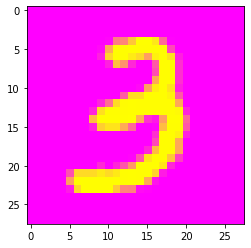

In [138]:
i = 7 #different iteration value will give different digit
plt.imshow(df_test.iloc[i, :].values.reshape(28,28), cmap = 'spring')
print(f'Prediction of Logistic Regression : {LR.predict(df_test.iloc[i,:].values.reshape(1,-1))}.')
print(f'Predication of Naive Bayes Model: {gnb.predict(df_test.iloc[i,:].values.reshape(1,-1))}.')
print(f'Prediction of Random Forest: {rf.predict(df_test.iloc[i,:].values.reshape(1,-1))}.')
print(f'Predication of SVM : {clf.predict(df_test.iloc[i,:].values.reshape(1,-1))}.')
print(f'Prediction of KNN: {KC.predict(df_test.iloc[i,:].values.reshape(1,-1))}.')